# Fraud Detector
This model predicts whether the customer is legit or a fraudulent agent by using developed machine learning methods , the model takes several values as input and based on those values generate a binary classification value (i.e 0,1) in which if the value is 0 then we can say that the particular person is not fraud if the value is 1 then the user is fraud.

In [1]:
#importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
# !pip install ggplot
import seaborn as sns
%matplotlib inline

In [4]:
#loading csv file as DataFrame
file = pd.read_csv('Fraud.csv')
df = pd.DataFrame(file)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
print(df['isFraud'].value_counts())
df['isFlaggedFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [18]:
print(len(df['step'].unique()))
df.describe()

743


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

# Treating Null Values
The only missing values in the dataset were the records related to Merchants.
Therefore I tried to find all the rows which contained merchants then I checked whether any of the records of merchants were fraudulent. None of them were fraud so it was safe to remove all the rows having records related to merchants.


In [17]:
merchents = df['nameDest'].str.startswith('M')
merchents.value_counts()

False    4211125
True     2151495
Name: nameDest, dtype: int64

In [73]:
#calculating fraud merchents
merchents_fraud = np.where((df['nameDest'].str.startswith('M')) & (df['isFraud'] == 1))
merchents_fraud

(array([], dtype=int64),)

In [51]:
#recheck
found_merchent = df[df['nameDest'].str.contains('M')]
isfraud = found_merchent['isFraud'].value_counts()
print(isfraud)
isfraud_flag = found_merchent['isFlaggedFraud'].value_counts()
isfraud_flag

0    2151495
Name: isFraud, dtype: int64


0    2151495
Name: isFlaggedFraud, dtype: int64

In [35]:
# Remove rows which contains merchant

check_flages = df[df.amount > 200000]
check_flages['isFlaggedFraud'].value_counts()

0    1673554
1         16
Name: isFlaggedFraud, dtype: int64

In [5]:
df1 = df[~df.nameDest.str.contains("M")]
print(df1['isFraud'].value_counts())
len(df1['isFraud'])

0    4202912
1       8213
Name: isFraud, dtype: int64


4211125

In [6]:
print(df1['nameOrig'].value_counts())
print(df1['nameDest'].value_counts())
len(df1['nameDest'].unique())

C1462946854    3
C1902386530    3
C724452879     3
C2098525306    3
C97092589      2
              ..
C231598296     1
C171239665     1
C1346635166    1
C945861963     1
C1717602520    1
Name: nameOrig, Length: 4207035, dtype: int64
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1862547118      1
C96145462        1
C993559733       1
C2136436129      1
C236615930       1
Name: nameDest, Length: 571961, dtype: int64


571961

In [50]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
#Due to class imbalance I am performing undersampling.
#If we wouldn't have performed undersampling this model would overfit i.e. it would only predict one output.
not_fraud_indecis = df1[df1.isFraud == 0].index
random_indices = np.random.choice(not_fraud_indecis, 15000, replace=False)
not_fraud_sample = df1.loc[random_indices]

fraud_indecis = df1[df1.isFraud == 1].index
sample_size = sum(df1.isFraud == 1)
random_indices = np.random.choice(fraud_indecis, sample_size, replace=False)
fraud_sample = df1.loc[random_indices]

In [8]:
subsample_df1 = pd.concat([not_fraud_sample, fraud_sample])
shuffled_subsample_df1 = subsample_df1.sample(frac=1).reset_index(drop=True)
shuffled_subsample_df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,282,CASH_OUT,45700.35,C677010803,24500.00,0.00,C484662858,0.00,45700.35,0,0
1,201,TRANSFER,315815.55,C150755099,0.00,0.00,C111311560,4428928.12,4744743.67,0,0
2,516,TRANSFER,2625132.51,C1656607369,2625132.51,0.00,C391839907,0.00,0.00,1,0
3,733,TRANSFER,1548376.44,C1119842359,1548376.44,0.00,C826187044,0.00,0.00,1,0
4,58,CASH_OUT,106673.26,C160197221,106673.26,0.00,C431559844,0.00,106673.26,1,0
...,...,...,...,...,...,...,...,...,...,...,...
23208,280,CASH_OUT,108078.15,C1790132440,21138.00,0.00,C185164661,216000.33,324078.48,0,0
23209,596,CASH_IN,188447.73,C1384412367,1406579.99,1595027.72,C628419229,3326728.20,3138280.47,0,0
23210,227,CASH_OUT,53096.68,C1999845775,0.00,0.00,C1118782322,418083.73,464901.21,0,0
23211,305,CASH_IN,251484.78,C560950876,13178594.98,13430079.76,C167273954,2705326.73,2453841.95,0,0


In [9]:
shuffled_subsample_df1['isFraud'].value_counts()

0    15000
1     8213
Name: isFraud, dtype: int64

In [10]:
shuffled_subsample_df1.to_csv('train_fraud_ver1.csv')

# Visualisation


In [24]:
#for visualization
v=pd.read_csv('train_fraud_ver1.csv')

In [25]:
v=v.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud', 'Unnamed: 0'])

In [26]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
v['type']= le.fit_transform(v['type'])
  
v['type'].unique()

array([1, 3, 0, 2])

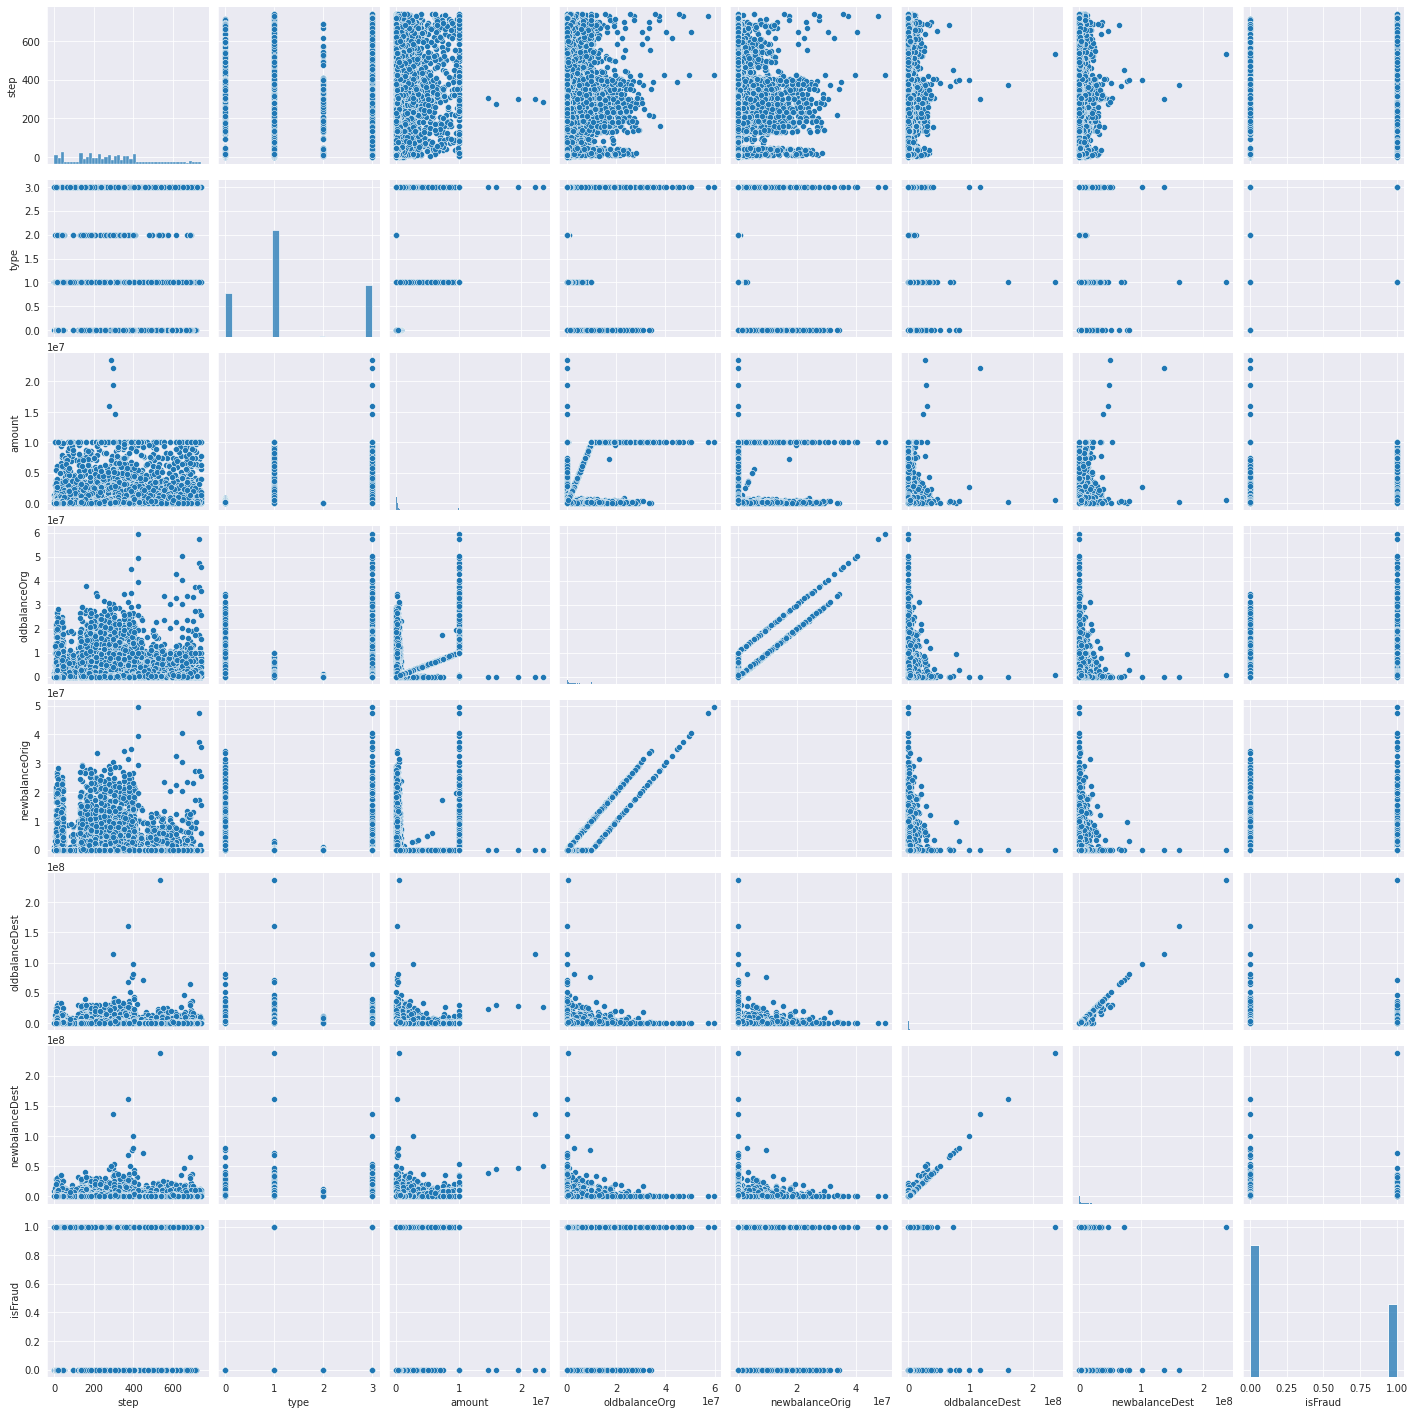

In [27]:
sns.set_style('darkgrid')
sns.pairplot(v)

<AxesSubplot:>

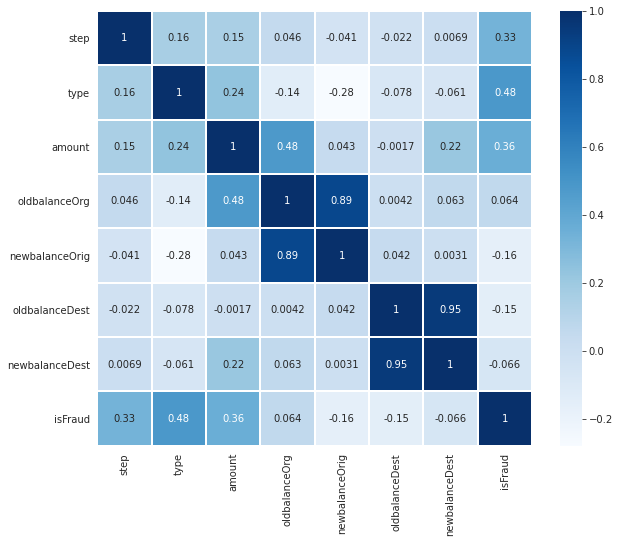

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(v.corr(),cmap='Blues',annot=True,square= True,linewidth=1,linecolor='white')

<AxesSubplot:xlabel='amount', ylabel='type'>

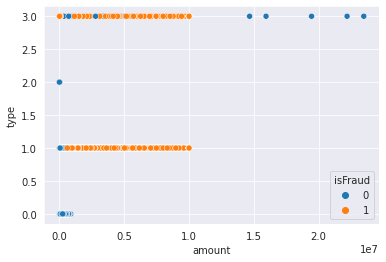

In [29]:
sns.scatterplot(x='amount',y='type',hue='isFraud',data=v)

# selecting variables to be included in the model
The variable or features were selected by how many variables are correlated with the target variable according to that total seven variables are selected.

In [11]:
#dropping irrelevent columns- 'nameOrig,nameDest and isFlaggedFraud'
print(shuffled_subsample_df1['nameOrig'].value_counts())
shuffled_subsample_df1=shuffled_subsample_df1.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

C23490021      1
C914409770     1
C1653706361    1
C821537883     1
C1096855855    1
              ..
C1939406184    1
C196404528     1
C1267044012    1
C764470039     1
C583786481     1
Name: nameOrig, Length: 23213, dtype: int64


# key Fearures
Step,
Type,
Amount,
OldBalanceOrg,
NewBalanceOrg,
OldBalanceDest,
NewBalanceDest



In [30]:
# X=shuffled_subsample_df1.drop(columns=['isFraud'])
# Y=shuffled_subsample_df1['isFraud']
X=v.drop(columns=['isFraud'])
Y=v['isFraud']

In [14]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
X['type']= le.fit_transform(X['type'])
  
X['type'].unique()

array([1, 3, 0, 2])

In [14]:
le = preprocessing.LabelEncoder()
shuffled_subsample_df1['type']= le.fit_transform(shuffled_subsample_df1['type'])
  
shuffled_subsample_df1['type'].unique()

array([1, 3, 0, 2])

# Decision Tree Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.1,random_state=5)

classifier = DecisionTreeClassifier(max_depth=10, random_state=3) 
# training the classifier
classifier.fit(x_train, y_train)
# do our predictions on the test
train_pred = classifier.predict(x_train)
predictions = classifier.predict(x_test)
# see how good we did on the test
print('Training Accuracy : {}%'.format(accuracy_score(y_true = y_train, y_pred = train_pred)*100))
print('Testing Accuracy : {}%'.format(accuracy_score(y_true = y_test, y_pred = predictions)*100))
target_names = ['0','1']
print('++++++++++++++++++++++++++++++ \n Classification Report:')
print(classification_report(y_true = y_test, y_pred = predictions, target_names=target_names))
print('++++++++++++++++++++++++++++++ \n Confusion Matrix:')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))


Training Accuracy : 99.38729596476952%
Testing Accuracy : 98.49267872523686%
++++++++++++++++++++++++++++++ 
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1456
           1       0.97      0.99      0.98       866

    accuracy                           0.98      2322
   macro avg       0.98      0.99      0.98      2322
weighted avg       0.99      0.98      0.98      2322

++++++++++++++++++++++++++++++ 
 Confusion Matrix:
Predicted      0     1    All
True                         
0          13434   110  13544
1             18  7329   7347
All        13452  7439  20891


# Demonstrating the performance of the model.
I used Confusion matrix, Grid search and k-fold cross validation to demonstrate the performance of model.


In [16]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(x_train, y_train)
# the best estimator
print(grid_tree.best_estimator_)
#with its score
print('Best score Accuracy: {}%'.format(np.abs(grid_tree.best_score_)*100))

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=100)
Best score Accuracy: 98.40122104057866%


Performance in each fold:


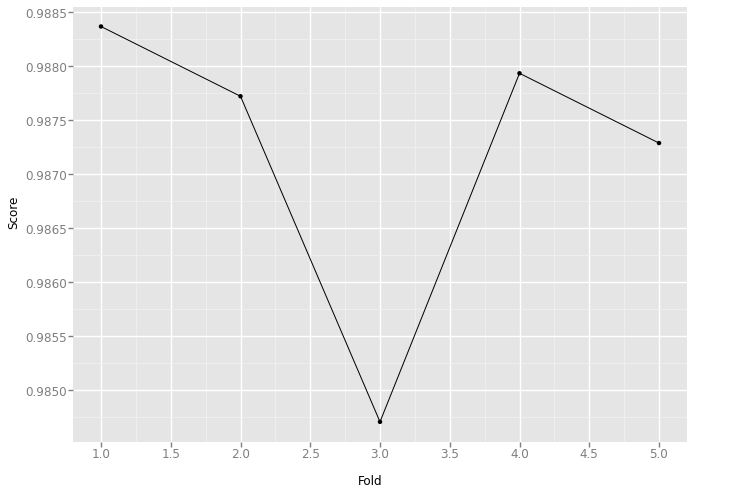

<ggplot: (-9223363276902855101)>


In [111]:
#K-Fold Cross-Validation
from sklearn.model_selection import KFold
from ggplot import *

kf = KFold(n_splits=5,random_state=42,shuffle=True)

features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(shuffled_subsample_df1)):
    training = shuffled_subsample_df1.iloc[train_index,:]
    valid = shuffled_subsample_df1.iloc[test_index,:]
    feats = training[features]
    label = training['isFraud']
    valid_feats = valid[features]
    valid_label = valid['isFraud']
    classifier.fit(feats,label)
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
print('Performance in each fold:')
g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()
print(g)

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
classifier = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=3)
# Train the classifier
classifier.fit(x_train, y_train)
# do our predictions on the test
train_pred = classifier.predict(x_train)
predictions = classifier.predict(x_test)
# see how good we did on the test
print('Training Accuracy : {}%'.format(accuracy_score(y_true = y_train, y_pred = train_pred)*100))
print('Testing Accuracy : {}%'.format(accuracy_score(y_true = y_test, y_pred = predictions)*100))
target_names = ['0','1']
print('++++++++++++++++++++++++++++++ \n Classification Report:')
print(classification_report(y_true = y_test, y_pred = predictions, target_names=target_names))

print('Features importance:')
featimp = pd.Series(classifier.feature_importances_, index=features).sort_values(ascending=False)
print (featimp)

print('++++++++++++++++++++++++++++++ \n Confusion Matrix:')
print(pd.crosstab(y_train, train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Training Accuracy : 99.30592121009046%
Testing Accuracy : 98.3204134366925%
++++++++++++++++++++++++++++++ 
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1456
           1       0.98      0.98      0.98       866

    accuracy                           0.98      2322
   macro avg       0.98      0.98      0.98      2322
weighted avg       0.98      0.98      0.98      2322

Features importance:
oldbalanceOrg     0.250901
amount            0.148339
type              0.128539
oldbalanceDest    0.128442
newbalanceOrig    0.127941
newbalanceDest    0.127521
step              0.088317
dtype: float64
++++++++++++++++++++++++++++++ 
 Confusion Matrix:
Predicted      0     1    All
True                         
0          13457    87  13544
1             58  7289   7347
All        13515  7376  20891


In [33]:
#performing Grid search on random forest classifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(x_train, y_train)
# the best estimator
print(grid_tree.best_estimator_)
#with its score
print('Best Accuracy Score: {}%'.format(np.abs(grid_tree.best_score_)*100))

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=100,
                       min_samples_split=20)
Best Accuracy Score: 97.86032214916703%


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
# Train the classifier
classifier.fit(x_train, y_train)
# do our predictions on the test
train_pred = classifier.predict(x_train)
predictions = classifier.predict(x_test)
# see how good we did on the test
print('Training Accuracy : {}%'.format(accuracy_score(y_true = y_train, y_pred = train_pred)*100))
print('Testing Accuracy : {}%'.format(accuracy_score(y_true = y_test, y_pred = predictions)*100))
target_names = ['0','1']
print('++++++++++++++++++++++++++++++ \n Classification Report:')
print(classification_report(y_true = y_test, y_pred = predictions, target_names=target_names))
print('++++++++++++++++++++++++++++++ \n Confusion Matrix:')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Training Accuracy : 92.96347709539994%
Testing Accuracy : 93.06632213608957%
++++++++++++++++++++++++++++++ 
 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1456
           1       0.91      0.90      0.91       866

    accuracy                           0.93      2322
   macro avg       0.93      0.92      0.93      2322
weighted avg       0.93      0.93      0.93      2322

++++++++++++++++++++++++++++++ 
 Confusion Matrix:
Predicted      0     1    All
True                         
0          12772   772  13544
1            698  6649   7347
All        13470  7421  20891
